In [1]:
import numpy as np
import matplotlib.image as img
from PIL import Image
import numpy.fft as fft
import scipy.stats as stats
import matplotlib.pyplot as plt


<img src= 'practica_4.jpg' width="600px">

In [112]:
# 1) Power spectra, 5 random realizations 
# Create a 1D real space array in order to define your real space framework : between 0 and 10 with 10000
#values
n = 10000
rs_array = np.linspace(0,10,n)
d = 10/n

# Calculate the corresponding frequencies
#sampling_rate = 1 / (rs_array[1] - rs_array[0]) 
k = np.fft.fftfreq(rs_array.shape[0],d)

for i in range(10):
    print(f"Frequency: {k[i]:.2f} Hz, Binning Information: {1/k[i]:.2f} units")





Frequency: 0.00 Hz, Binning Information: inf units
Frequency: 0.10 Hz, Binning Information: 10.00 units
Frequency: 0.20 Hz, Binning Information: 5.00 units
Frequency: 0.30 Hz, Binning Information: 3.33 units
Frequency: 0.40 Hz, Binning Information: 2.50 units
Frequency: 0.50 Hz, Binning Information: 2.00 units
Frequency: 0.60 Hz, Binning Information: 1.67 units
Frequency: 0.70 Hz, Binning Information: 1.43 units
Frequency: 0.80 Hz, Binning Information: 1.25 units
Frequency: 0.90 Hz, Binning Information: 1.11 units


/tmp/ipykernel_19963/2975797933.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"Frequency: {k[i]:.2f} Hz, Binning Information: {1/k[i]:.2f} units")


Text(0, 0.5, 'P(k)')

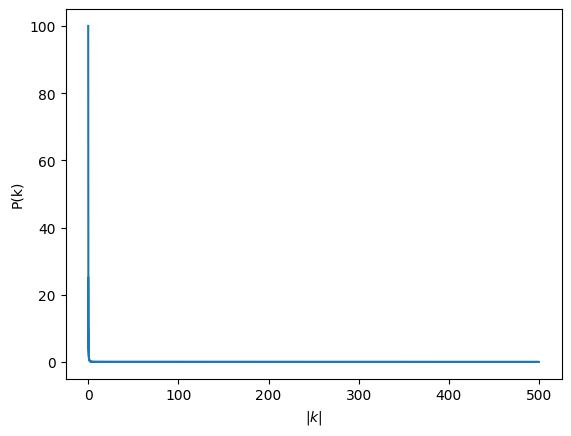

In [113]:
k_norm = np.sqrt(k**2)

e = 0.1

def P_k(k_x, epsilon):
    return (np.sqrt(k_x**2) + epsilon)**(-2)


power_spectrum = P_k(k,e)

plt.plot(k_norm,power_spectrum)
plt.xlabel('$|k|$')
plt.ylabel('P(k)')

In [114]:
# we define the array for alpha and the phase in the following way:
alpha_1 = np.random.normal(0, np.sqrt(P_k(k, e)), n)
alpha_2 = np.random.normal(0, np.sqrt(P_k(k, e)), n)
alpha_3 = np.random.normal(0, np.sqrt(P_k(k, e)), n)
alpha_4 = np.random.normal(0, np.sqrt(P_k(k, e)), n)
alpha_5 = np.random.normal(0, np.sqrt(P_k(k, e)), n)

phi_1 = np.random.uniform(0, 2 * np.pi, n)
phi_2 = np.random.uniform(0, 2 * np.pi, n)
phi_3 = np.random.uniform(0, 2 * np.pi, n)
phi_4 = np.random.uniform(0, 2 * np.pi, n)
phi_5 = np.random.uniform(0, 2 * np.pi, n)

# now, using the simmetry and antisymetry conditions for alpha and phi 
for i in range(n):
    alpha_1[-i] = alpha_1[i]
    alpha_2[-i] = alpha_2[i]
    alpha_3[-i] = alpha_3[i]
    alpha_4[-i] = alpha_4[i]
    alpha_5[-i] = alpha_5[i]

    phi_1[-i] = -phi_1[i]
    phi_2[-i] = -phi_2[i]
    phi_3[-i] = -phi_3[i]
    phi_4[-i] = -phi_4[i]
    phi_5[-i] = -phi_5[i]

# Compute ð
ð_1 = alpha_1 * np.exp(1j * phi_1)
ð_2 = alpha_2 * np.exp(1j * phi_2)
ð_3 = alpha_3 * np.exp(1j * phi_3)
ð_4 = alpha_4 * np.exp(1j * phi_4)
ð_5 = alpha_5 * np.exp(1j * phi_5)

for i in range(n): 
    ð_1[-i] = np.conj(ð_1[i])  
    ð_2[-i] = np.conj(ð_2[i]) 
    ð_3[-i] = np.conj(ð_3[i]) 
    ð_4[-i] = np.conj(ð_4[i])
    ð_5[-i] = np.conj(ð_5[i]) 

In [115]:

plot1 = fft.ifftn(fft.ifftshift(ð_1))
plot2 = fft.ifftn(fft.ifftshift(ð_2))
plot3 = fft.ifftn(fft.ifftshift(ð_3))
plot4 = fft.ifftn(fft.ifftshift(ð_4))
plot5 = fft.ifftn(fft.ifftshift(ð_5))

    

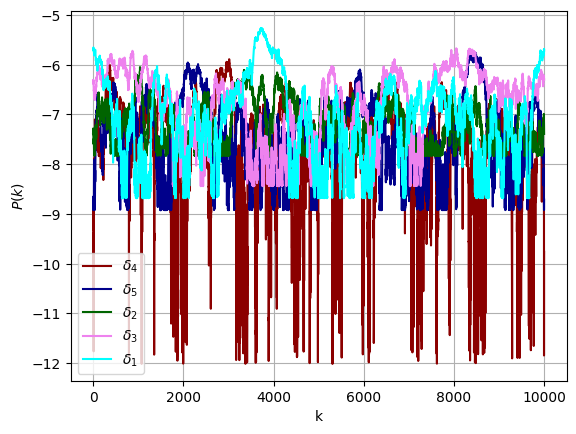

In [116]:

plt.plot(np.log(abs(plot4)),color='darkred',linestyle='-',label='$\delta_4$')
plt.plot(np.log(abs(plot5)),color='darkblue',linestyle='-',label='$\delta_5$')
plt.plot(np.log(abs(plot2)),color='darkgreen',linestyle='-',label='$\delta_2$')
plt.plot(np.log(abs(plot3)),color='violet',linestyle='-',label='$\delta_3$')
plt.plot(np.log(abs(plot1)),color='cyan',linestyle='-',label='$\delta_1$')
plt.xlabel('k')
plt.ylabel('$P(k)$')
plt.legend()
plt.grid()

### Part 2: 3 power sprectrum, 1D realization

In [86]:
 #1) Power spectra, 5 random realizations 
# Create a 1D real space array in order to define your real space framework : between 0 and 10 with 1000
n_1 = 1000
rs_array_1 = np.linspace(0,10,n_1)
d_1 = 10/n_1

k1 = np.fft.fftfreq(rs_array_1.shape[0],d_1)

for i in range(10):
    print(f"Frequency: {k1[i]:.2f} Hz, Binning Information: {1/k1[i]:.2f} units")

Frequency: 0.00 Hz, Binning Information: inf units
Frequency: 0.10 Hz, Binning Information: 10.00 units
Frequency: 0.20 Hz, Binning Information: 5.00 units
Frequency: 0.30 Hz, Binning Information: 3.33 units
Frequency: 0.40 Hz, Binning Information: 2.50 units
Frequency: 0.50 Hz, Binning Information: 2.00 units
Frequency: 0.60 Hz, Binning Information: 1.67 units
Frequency: 0.70 Hz, Binning Information: 1.43 units
Frequency: 0.80 Hz, Binning Information: 1.25 units
Frequency: 0.90 Hz, Binning Information: 1.11 units


/tmp/ipykernel_19963/2806086275.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"Frequency: {k1[i]:.2f} Hz, Binning Information: {1/k1[i]:.2f} units")


In [123]:
# 3) three diferents power spectrum 
k_norm_1 = np.sqrt(k1**2)
e1 = 0.001

def P_k2(k_2, epsilon2):
    return (np.sqrt(k_2**2) + epsilon2)**(-2)


def P_k3(k_3,epsilon3):
    return(np.sqrt(k_3**2) + epsilon3)**(-3)

def P_k4(k_4,epsilon4):
    return(np.sqrt(k_4**2) + epsilon4)**(-4) 


power_spectrum2 = P_k2(k1,e1)
power_spectrum3 = P_k3(k1,e1) 
power_spectrum4 = P_k4(k1,e1) 


In [124]:
# for P_2(k)
alpha_22 = np.random.normal(0,power_spectrum2, n_1)
phi_22 = np.random.uniform(0, 2*np.pi, n_1)
# for P_3(k)
alpha_33 = np.random.normal(0,power_spectrum3, n_1)
phi_33 = np.random.uniform(0, 2*np.pi, n_1)
# for the P_4(k)
alpha_44 = np.random.normal(0,power_spectrum4, n_1)
phi_44 = np.random.uniform(0, 2*np.pi, n_1)


for i in range(500):
    alpha_22[-i] = alpha_22[i]
    alpha_33[-i] = alpha_33[i]
    alpha_44[-i] = alpha_44[i]


    phi_22[-i] = - phi_22[i]
    phi_33[-i] = - phi_33[i]
    phi_44[-i] = - phi_44[i]


ð_22 = alpha_22*np.exp(1j*phi_22)
ð_33 = alpha_33*np.exp(1j*phi_33)
ð_44 = alpha_44 * np.exp(1j*phi_44)

for i in range(500): 
    ð_22[-i] = np.conj(ð_22[i])  
    ð_33[-i] = np.conj(ð_33[i]) 
    ð_44[-i] = np.conj(ð_44[i])   


In [125]:
plot22 = fft.ifftn(fft.ifftshift(ð_22))
plot33 = fft.ifftn(fft.ifftshift(ð_33))
plot44 = fft.ifftn(fft.ifftshift(ð_44))

(-49.95, 1048.95, 3.5991540442584156, 3.6001568546445095)

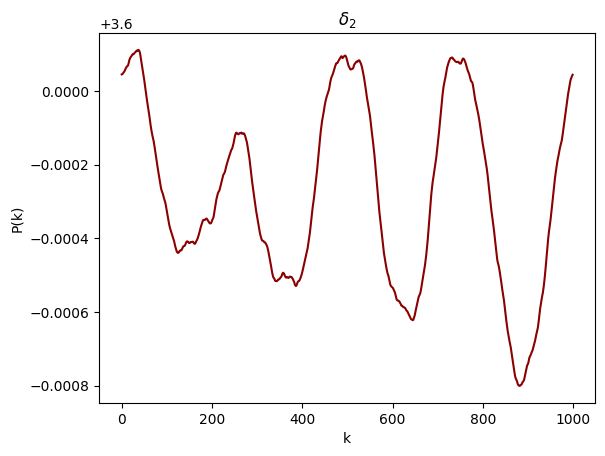

In [131]:
plt.plot(np.log(abs(plot22)),color='darkred',linestyle='-')
plt.title('$\delta_2$')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.axis()

(-49.95, 1048.95, 12.42523767596584, 12.425276752769213)

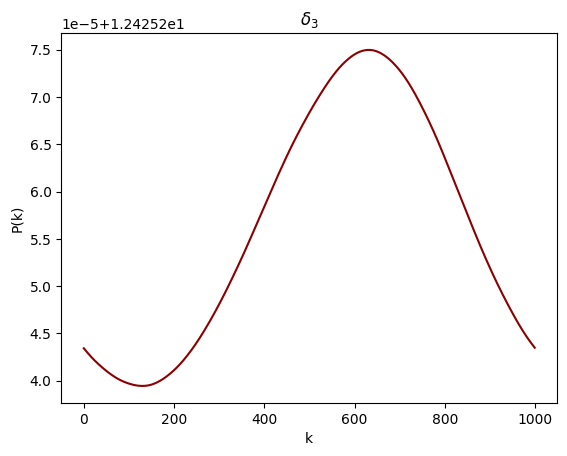

In [129]:
plt.plot(np.log(abs(plot33)),color='darkred',linestyle='-')
plt.title('$\delta_3$')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.axis()

(-49.95, 1048.95, 18.30716533615582, 18.307165382398466)

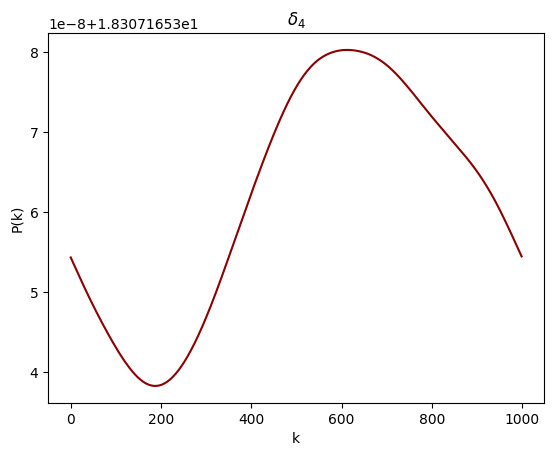

In [130]:
plt.plot(np.log(abs(plot44)),color='darkred',linestyle='-')
plt.title('$\delta_4$')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.axis()